# Exercise 5: Observation model


## 5.1 Implement model for perceiving landmarks

Consider a robot that operates in an environment populated by **range-only** sensors such as _beacons_.
These sensors transmit a signal that allows for obtaining noisy measurements of their distance from a receiver mounted on the robot.

The function `landmark_observation_model` realizes the observation model for perceiving landmarks with a range sensor. It takes as input:
 
- the observed noisy range $z$
- the standard deviation of the measurement $\sigma_z$ (zero-mean Gaussian noise)
- the position of the robot in the map $x$
- the position of the beacon transmitting beacon in the map $m$

The output of this function is the probability $p(z | x, m)$ that the measurement $z$ was obtained at position $x$.

Implement the `landmark_observation_model` function and verify that it is correct for some test input. **[2.0]**

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [15]:
def landmark_observation_model(z, sigma_z, x, m):
    x_robot=x[0]
    y_robot=x[1]
    theta_robot=x[2]
    x_landmark=m[0]
    y_landmark=m[1]

    # calculate z, the observation (distance to the landmark)
    z_hat=np.sqrt((x_robot-x_landmark)**2+(y_robot-y_landmark)**2)

    # since we have std dev already, directly use the gaussian distribution prob function
    normalize=1/(np.sqrt(2*np.pi*(sigma_z**2)))
    exponent=-((z_hat-z)**2)/(2*sigma_z**2)
    prob=normalize*np.exp(exponent)

    return prob


In [3]:
pr=landmark_observation_model(5.3, 0.5, [0.0, 0.0, 0.0],[3.0, 4.0, np.pi/2])
print(pr)

0.6664492057835995


---

## 5.2 Compute likelihood of measurement in the environment

The robot operates in an environment that is represetend by a 20x20 grid map and contains a beacon at position $m_1 = [0,0]$ (top-left corner). 

The robot obtains a range measurement of the beacon $z_1 = 10$ and the sensor noise is $\sigma_{z1} = 1$.

Compute the `landmark_observation_model` at each cell of the environment and plot the likelihood of the observation over the environment. **[1.0]** 

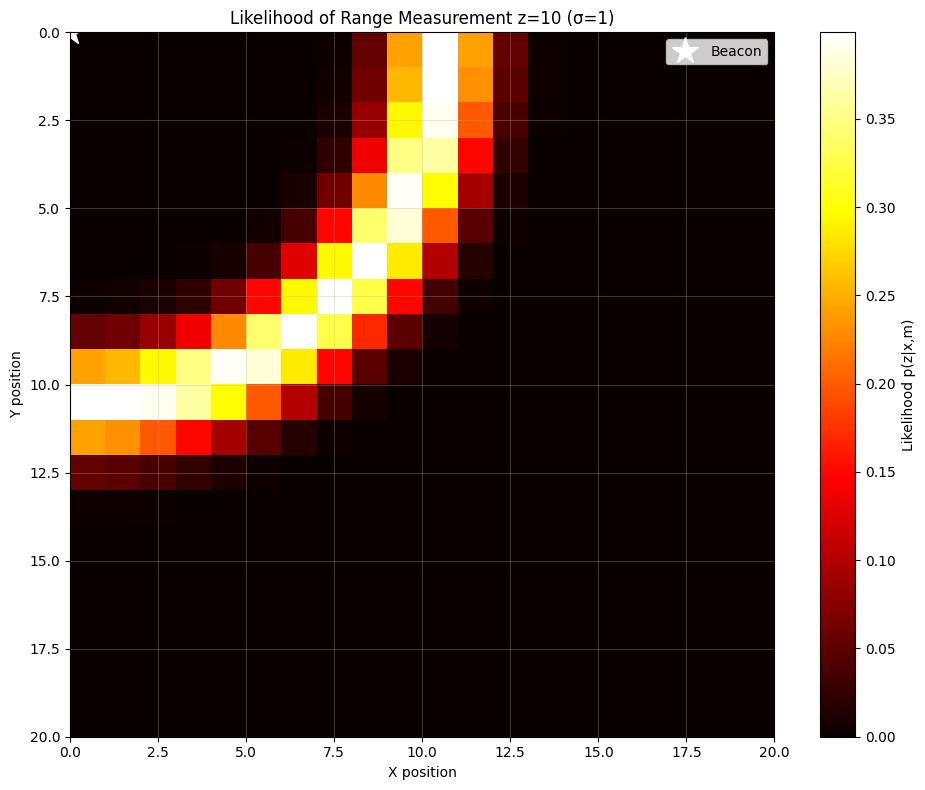

In [16]:
grid_size=20
beacon_pos1=[0, 0]
z1=10
sigma_z1=1

likelihood_map=np.zeros((grid_size, grid_size))

for i in range(grid_size):
    for j in range(grid_size):
        robot_pos=[i, j, 0]
        likelihood_map[i, j]=landmark_observation_model(z1, sigma_z1, robot_pos, beacon_pos1)
        # each point is the prob of z 
        
plt.figure(figsize=(10, 8))
plt.imshow(likelihood_map, cmap='hot', origin='upper', extent=[0, grid_size, grid_size, 0])
plt.colorbar(label='Likelihood p(z|x,m)')
plt.plot(beacon_pos1[0], beacon_pos1[1], 'w*', markersize=20, label='Beacon')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.title(f'Likelihood of Range Measurement z={z1} (σ={sigma_z1})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---

## 5.3 Multiple landmarks

Assume that we install two **additional** beacons in our environment:

- $m_2 = [0, 10]$
- $m_3 = [10, 0]$

from which we obtain the following observations:

- $z_2 = 5$ with $\sigma_{z2} = 3$
- $z_3 = 9$ with $\sigma_{z3} = 2$

Compute the `landmark_observation_model` at each cell of the environment considering the measurements from **all** beacons and plot the **joint** likelihood of the observations over the environment. **[2.0]** 

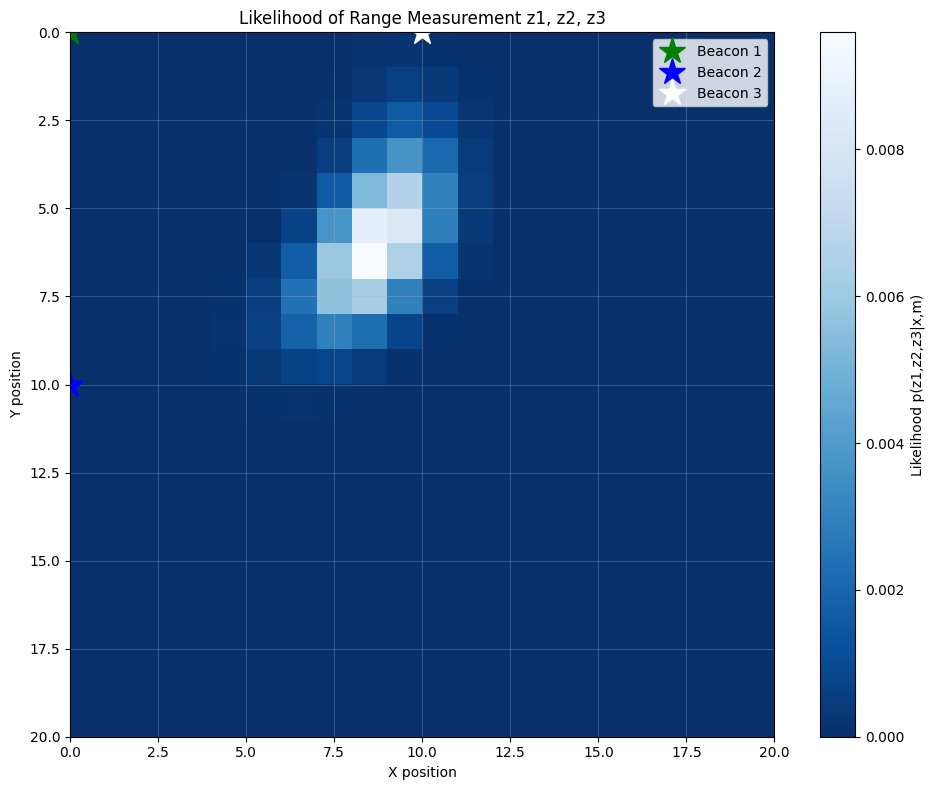

In [30]:
beacon_pos1=[0, 0]
beacon_pos2=[0, 10]
beacon_pos3=[10, 0]

z2=5
sigma_z2=3

z3=9
sigma_z3=2

likelihood_map=np.zeros((grid_size, grid_size))

for i in range(grid_size):
    for j in range(grid_size):
        robot_pos=[i, j, 0]
        p1=landmark_observation_model(z1, sigma_z1, robot_pos, beacon_pos1)
        p2=landmark_observation_model(z2, sigma_z2, robot_pos, beacon_pos2)
        p3=landmark_observation_model(z3, sigma_z3, robot_pos, beacon_pos3)
        likelihood_map[i, j]=p1*p2*p3

plt.figure(figsize=(10, 8))
plt.imshow(likelihood_map, cmap='Blues_r', origin='upper', extent=[0, grid_size, grid_size, 0])
plt.colorbar(label='Likelihood p(z1,z2,z3|x,m)')
plt.plot(beacon_pos1[0], beacon_pos1[1], 'g*', markersize=20, label='Beacon 1')
plt.plot(beacon_pos2[0], beacon_pos2[1], 'b*', markersize=20, label='Beacon 2')
plt.plot(beacon_pos3[0], beacon_pos3[1], 'w*', markersize=20, label='Beacon 3')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.title(f'Likelihood of Range Measurement z1, z2, z3')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



        



    